## Group 14C - Fake News Detector Project

---




---


AI4ALL Ignite - Fall 2024 : Wynne Conger, Nina Elmoyan, Ramneek Kaur, Rhode Sanchez


In [ ]:
import pandas as pd
from pathlib import Path

import numpy as np

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ninaelmoyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ninaelmoyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ninaelmoyan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ninaelmoyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

For this project, we are using two .csv files: fake.csv and true.csv

In [ ]:
df_fake = pd.read_csv(Path("Dataset") / "Fake.csv")
df_true = pd.read_csv(Path("Dataset") / "True.csv")

display(df_fake.head())
display(df_true.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Adding a 'label' column to df_fake and df_true: fake = 0 and true = 1

In [ ]:
df_fake['label'] = 0
df_true['label'] = 1

display(df_fake.head())
display(df_true.head())

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


Next Steps: do correlation analysis to test whether we should keep the date column or not

### NINA - CLEAN UP THE CODE BELOW !!!

### Identifiers of Fake News: (Nina)

<ol>
<li> Number of words: Fake news has fewer words on average than real news </li>
<li> Question marks: Fake news has more question marks </li>
<li> Mood / Negativity of text: Fake news is more negative </li>
<li> Opposition words: True texts contain more objections and oppositions </li>
<li> Pronouns: ("you", "they") of true news vs. ("I" and "we") of fake news </li>
<li> Lexical Diversity: more lexical diversity in real news than in fake news</li>
<li> Profanity: fake news is more likely to feature profane words than real news</li>
<li> Punctuation in title: Fake news features more exclaimation points and question marks than real news </li>
</ol>

### 1. Testing Number of words - confirmed

In [4]:
# 1. Testing number of words - confirmed !

df_fake['word_count'] = df_fake['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df_true['word_count'] = df_true['text'].apply(lambda x: len(nltk.word_tokenize(x)))

avg_fake_words = df_fake['word_count'].mean()
avg_true_words = df_true['word_count'].mean()

print(f"Average words in fake news: {avg_fake_words:.2f}")
print(f"Average words in true news: {avg_true_words:.2f}")

KeyboardInterrupt: 

### 2. Testing Question Marks - confirmed

In [ ]:
# 2. Testing question marks - confirmed !
df_fake['question_marks'] = df_fake['text'].apply(lambda x: x.count('?'))
df_true['question_marks'] = df_true['text'].apply(lambda x: x.count('?'))

avg_fake_qm = df_fake['question_marks'].mean()
avg_true_qm = df_true['question_marks'].mean()

print(f"Average question marks in fake news: {avg_fake_qm:.2f}")
print(f"Average question marks in true news: {avg_true_qm:.2f}")

Average question marks in fake news: 1.21
Average question marks in true news: 0.10


### 3. Testing mood / negativity of text

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
df_fake['negativity'] = df_fake['text'].apply(lambda x: sia.polarity_scores(x)['neg'])
df_true['negativity'] = df_true['text'].apply(lambda x: sia.polarity_scores(x)['neg'])

avg_fake_neg = df_fake['negativity'].mean()
avg_true_neg = df_true['negativity'].mean()

med_fake_neg = df_fake['negativity'].median()
med_true_neg = df_true['negativity'].median()

print(f"Average negativity in fake news: {avg_fake_neg:.2f}")
print(f"Average negativity in true news: {avg_true_neg:.2f}")


Average negativity in fake news: 0.09
Average negativity in true news: 0.08


### 4. Testing opposition words

In [ ]:
# 4. Testing opposition words - not confirmed

# using sets
opposition_words = {'but', 'however', 'although', 'though', 'yet', 'nevertheless', 'nonetheless', 'despite', 'instead'}

# pandas dataframe - adding a column into each dataframe called opposition_count
df_fake['opposition_count'] = df_fake['text'].apply(lambda x: sum(1 for word in nltk.word_tokenize(x.lower()) if word in opposition_words))
df_true['opposition_count'] = df_true['text'].apply(lambda x: sum(1 for word in nltk.word_tokenize(x.lower()) if word in opposition_words))

# can read more about lambda and apply - lamda python search

avg_fake_opp = df_fake['opposition_count'].mean()
avg_true_opp = df_true['opposition_count'].mean()

print(f"Average opposition words in fake news: {avg_fake_opp:.2f}")
print(f"Average opposition words in true news: {avg_true_opp:.2f}")

Average opposition words in fake news: 2.09
Average opposition words in true news: 1.79


In [ ]:
df_fake['text'] # applying a function called x

0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 23481, dtype: object

### *** Notes from Rutendo ***

Python data structures

- lists using [], can be repeated
- sets using {}, unordered unique instances such as above
- tupal (), ordered unique instances, cannot be changed after
- ** dictionaries using {   ,    ,     ,   } --> with unique key : value  ex: 'but' : 

Pandas data structures
- columns
- rows

### 5. Testing pronouns:

In [ ]:
# 5. Testing pronouns: ("you", "they") of true news vs. ("I" and "we") of fake news

first_person_pronouns = {'i', 'we', 'me', 'us', 'my', 'our', 'mine', 'ours'}
second_third_person_pronouns = {'you', 'he', 'she', 'they', 'him', 'her', 'them', 'your', 'his', 'its', 'their', 'yours', 'theirs'}

def count_pronouns(text):
    first_person_count = 0
    second_third_person_count = 0
    words = nltk.word_tokenize(str(text).lower())
    for word in words:
        if word in first_person_pronouns:
            first_person_count += 1
        elif word in second_third_person_pronouns:
            second_third_person_count += 1
    return pd.Series([first_person_count, second_third_person_count])

df_fake[['first_person_count', 'second_third_person_count']] = df_fake['text'].apply(count_pronouns)
df_true[['first_person_count', 'second_third_person_count']] = df_true['text'].apply(count_pronouns)

avg_fake_fp = df_fake['first_person_count'].mean()
avg_fake_stp = df_fake['second_third_person_count'].mean()

avg_true_fp = df_true['first_person_count'].mean()
avg_true_stp = df_true['second_third_person_count'].mean()

print(f"Average first-person pronouns in fake news: {avg_fake_fp:.2f}")
print(f"Average second/third-person pronouns in fake news: {avg_fake_stp:.2f}")
print("-" * 30)
print(f"Average first-person pronouns in true news: {avg_true_fp:.2f}")
print(f"Average second/third-person pronouns in true news: {avg_true_stp:.2f}")

Average first-person pronouns in fake news: 5.63
Average second/third-person pronouns in fake news: 14.99
------------------------------
Average first-person pronouns in true news: 2.52
Average second/third-person pronouns in true news: 9.20


--> Room for analysis: Why are there more pronouns in fake news? Because it is less specific

### 6. Testing lexical diversity

In [ ]:
# 6. Testing lexical diversity

def lexical_diversity_optimized(text):
    """
    Calculates lexical diversity, focusing only on alphabetic words.
    This provides a more accurate measure of vocabulary richness by ignoring punctuation.
    """
    # 1. Tokenize and convert to lower case
    tokens = nltk.word_tokenize(str(text).lower())
    
    # 2. OPTIMIZATION: Filter for alphabetic words only
    words = [word for word in tokens if word.isalpha()]
    # list comprehension - learn more
    
    # 3. Handle the edge case of no words being found
    if len(words) == 0:
        return 0
        
    # 4. Calculate diversity using the cleaned word list
    unique_words_count = len(set(words))
    total_words_count = len(words)
    
    return unique_words_count / total_words_count

# --- Apply the optimized function to your DataFrames ---
df_fake['lexical_diversity'] = df_fake['text'].apply(lexical_diversity_optimized)
df_true['lexical_diversity'] = df_true['text'].apply(lexical_diversity_optimized)

# --- Calculate and print the results ---
avg_fake_lex_div = df_fake['lexical_diversity'].mean()
avg_true_lex_div = df_true['lexical_diversity'].mean()

med_fake_lex_div = df_fake['lexical_diversity'].median()
med_true_lex_div = df_true['lexical_diversity'].median()

print(f"Average lexical diversity in fake news: {avg_fake_lex_div:.2f}")
print(f"Average lexical diversity in true news: {avg_true_lex_div:.2f}")

print(f"Median lexical diversity in fake news: {med_fake_lex_div:.2f}")
print(f"Median lexical diversity in true news: {med_true_lex_div:.2f}")

# can plot the mimimum to compare

print("There is mild difference that is sigificant.")

Average lexical diversity in fake news: 0.56
Average lexical diversity in true news: 0.58
Median lexical diversity in fake news: 0.55
Median lexical diversity in true news: 0.56
There is mild difference that is sigificant.


### 7. Testing Punctuation in title (including ! and ?) - SIGNIFICANT


In [ ]:
# 8. Testing punctuation in title (Separating ! and ?)

# Count Exclamation Points (!)
df_fake['title_exclamation'] = df_fake['title'].str.count('!')
df_true['title_exclamation'] = df_true['title'].str.count('!')

# Count Question Marks (?) 
# Note: We use '\?' because ? is a special character in regex, so it must be escaped
df_fake['title_question'] = df_fake['title'].str.count(r'\?')
df_true['title_question'] = df_true['title'].str.count(r'\?')

# Calculate Averages
avg_fake_excl = df_fake['title_exclamation'].mean()
avg_true_excl = df_true['title_exclamation'].mean()

avg_fake_ques = df_fake['title_question'].mean()
avg_true_ques = df_true['title_question'].mean()

# Print Results
print("="*40)
print("      Title Punctuation Analysis")
print("="*40)
print(f"Average '!' in fake titles: {avg_fake_excl:.2f}")
print(f"Average '!' in true titles: {avg_true_excl:.2f}")
print("-" * 30)
print(f"Average '?' in fake titles: {avg_fake_ques:.2f}")
print(f"Average '?' in true titles: {avg_true_ques:.2f}")
print("="*40)

      Title Punctuation Analysis
Average '!' in fake titles: 0.15
Average '!' in true titles: 0.00
------------------------------
Average '?' in fake titles: 0.07
Average '?' in true titles: 0.01


### 8. Testing profanity count

In [ ]:
import nltk
from better_profanity import profanity

from better_profanity import profanity

# --- 1. Load the default list of profane words ---
# It's efficient to do this once, outside the function.
profanity.load_censor_words()

def count_profanity(text):
    """
    This function tokenizes a text and counts the number of words
    that appear in the profanity list.
    """
    # Ensure input is a string and convert to lowercase
    text = str(text).lower()
    
    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)
    
    # Count how many of the words are considered profane
    profanity_count = 0
    for word in words:
        if profanity.contains_profanity(word):
            profanity_count += 1
            
    return profanity_count


In [ ]:
# --- 1. Apply the function to create a new 'profanity_count' column ---
print("\nAnalyzing profanity counts in the datasets...")
df_fake['profanity_count'] = df_fake['text'].apply(count_profanity)
df_true['profanity_count'] = df_true['text'].apply(count_profanity)
print("Analysis complete.")

# --- 2. Calculate the average profanity count for each category ---
avg_fake_profanity = df_fake['profanity_count'].mean()
avg_true_profanity = df_true['profanity_count'].mean()

# --- 3. Print the final results ---
print("\n" + "="*40)
print("        Profanity Analysis Report")
print("="*40)
print(f"Average profanity count in fake news: {avg_fake_profanity:.2f} words per article")
print(f"Average profanity count in true news: {avg_true_profanity:.2f} words per article")
print("="*40)

### 9A. Testing lexical diversity


In [ ]:
# --- Statistical Testing for Lexical Diversity --- I used Gemini 2.5 code to test it out to see if the difference from above is significant


from scipy import stats

# Ensure there are no missing values in the columns being tested
lex_div_fake = df_fake['lexical_diversity'].dropna()
lex_div_true = df_true['lexical_diversity'].dropna()

# Perform the independent t-test
t_statistic, p_value = stats.ttest_ind(lex_div_fake, lex_div_true)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
if p_value < 0.05:
    print("\nThe difference is statistically significant.")
else:
    print("\nThe difference is not statistically significant.")

# tests assume a normal distribution, trying to see whether the 
# number is outside of the range

T-statistic: -21.3468
P-value: 0.0000

The difference is statistically significant.


### 9B. Plotting lexical diversity

<Axes: >

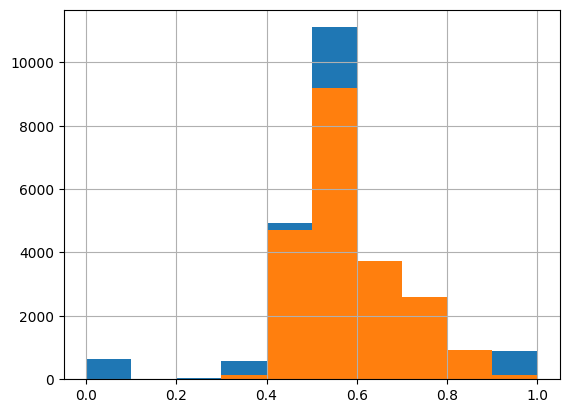

In [ ]:
df_fake['lexical_diversity'].hist()

df_true['lexical_diversity'].hist()

## Correlation Analysis

Correlation Matrix:
                            is_fake  word_count  negativity  \
is_fake                    1.000000    0.044010    0.158118   
word_count                 0.044010    1.000000    0.115679   
negativity                 0.158118    0.115679    1.000000   
first_person_count         0.215729    0.540970    0.076717   
second_third_person_count  0.232287    0.727634    0.157469   
lexical_diversity         -0.100239   -0.503636    0.012315   

                           first_person_count  second_third_person_count  \
is_fake                              0.215729                   0.232287   
word_count                           0.540970                   0.727634   
negativity                           0.076717                   0.157469   
first_person_count                   1.000000                   0.570521   
second_third_person_count            0.570521                   1.000000   
lexical_diversity                   -0.291996                  -0.438814   

     

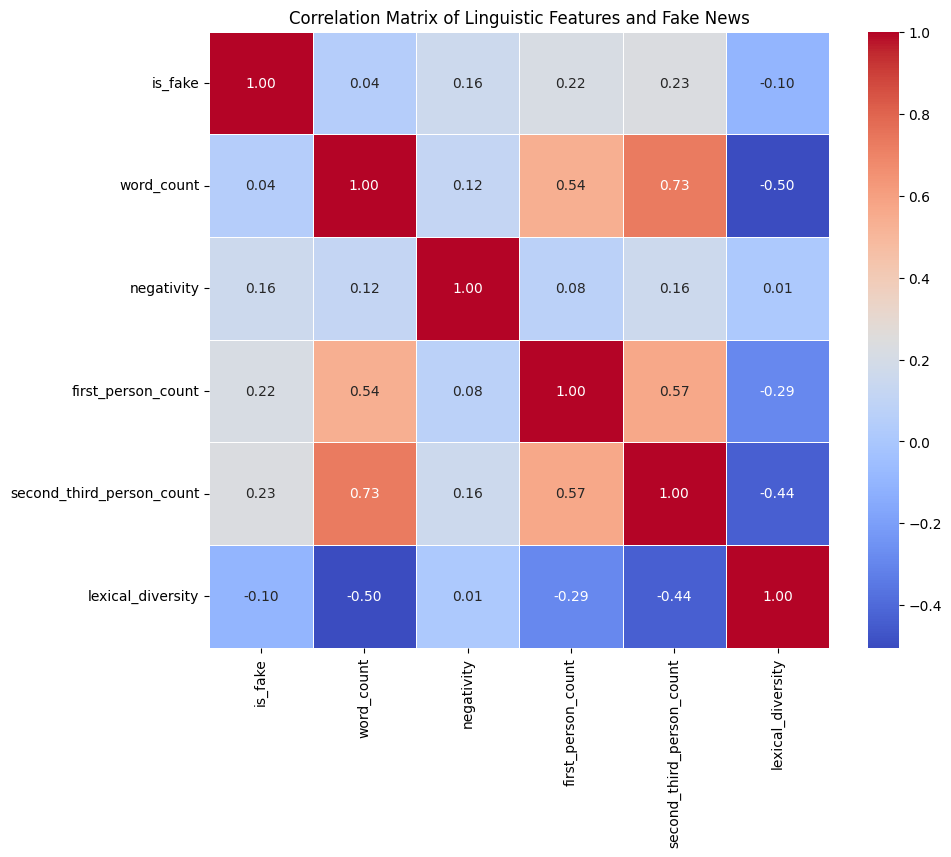

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. Data Preparation ---
# Assuming df_fake and df_true are already loaded and have your feature columns
# ('word_count', 'negativity', etc.)

# Create a target variable: 1 for fake, 0 for true
df_fake['is_fake'] = 1
df_true['is_fake'] = 0

# Combine into a single DataFrame
df_combined = pd.concat([df_fake, df_true], ignore_index=True)


# --- 2. Correlation Calculation ---
# Select only the numerical columns for the analysis
numerical_features = [
    'is_fake',
    'word_count',
    'negativity',
    'first_person_count',
    'second_third_person_count
    'lexical_diversity',
    
]
df_corr = df_combined[numerical_features]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()


# --- 3. Visualization ---
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Linguistic Features and Fake News')
plt.show()


#### Test correlation analysis: DOESN'T RUN YET, MUST BE RE-EVALUATED

Combined DataFrame created with 44898 total articles.

--- Analyzing the 'subject' column ---


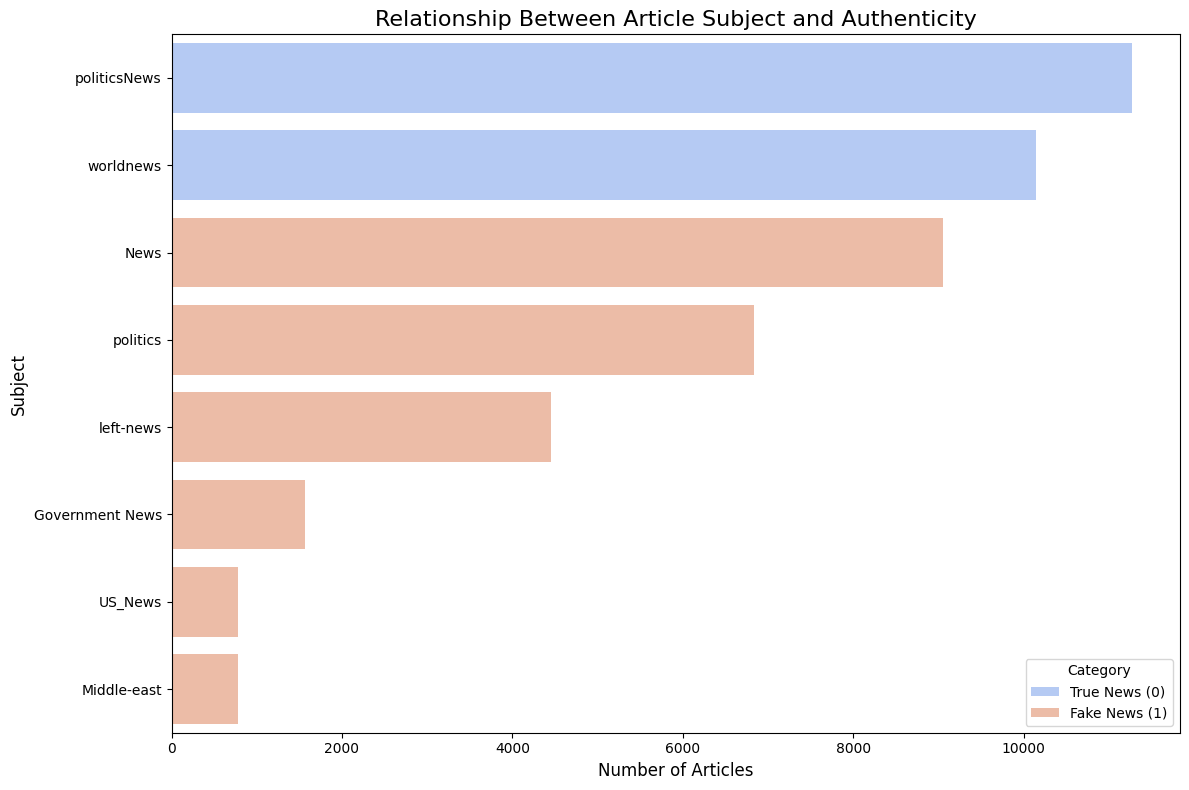


--- Analyzing the 'date' column ---


/var/folders/nz/dx13jqsj38z49vg6zl5q7l500000gn/T/ipykernel_67346/1452919445.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  fake_counts_by_month = df_plot[df_plot['is_fake'] == 1]['is_fake'].resample('M').size()
/var/folders/nz/dx13jqsj38z49vg6zl5q7l500000gn/T/ipykernel_67346/1452919445.py:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  true_counts_by_month = df_plot[df_plot['is_fake'] == 0]['is_fake'].resample('M').size()


ValueError: zero-size array to reduction operation fmin which has no identity

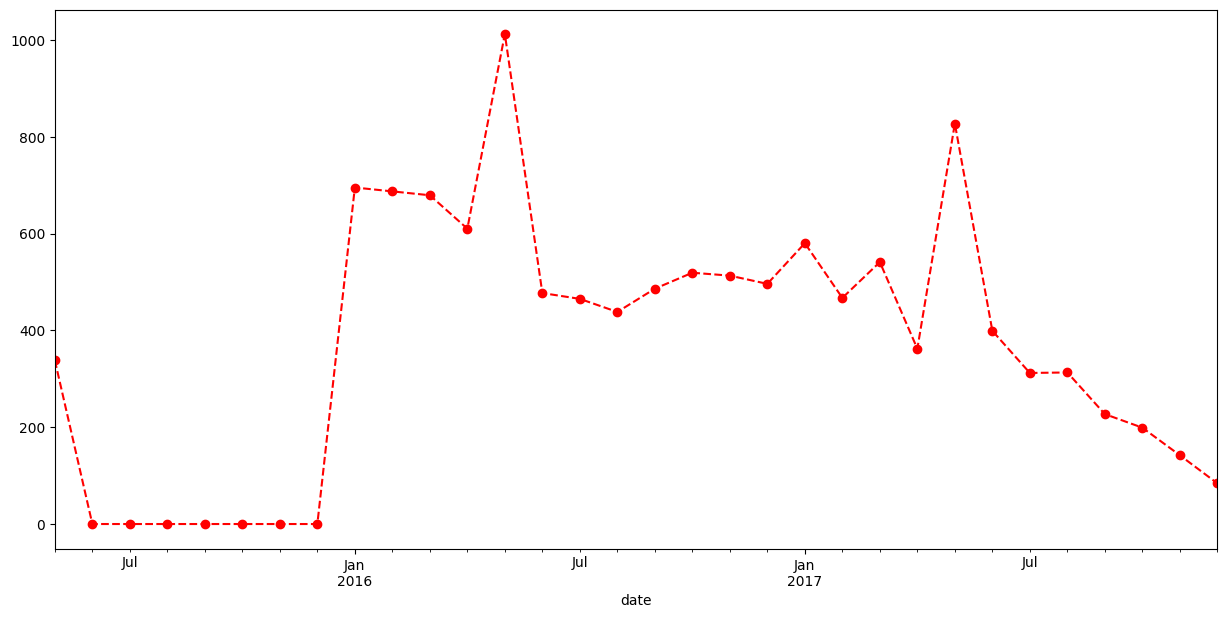

In [ ]:
'''
 # --- Prepare a combined DataFrame for analysis ---
# Create a target column 'is_fake' (1 for fake, 0 for true)
df_fake['is_fake'] = 1
df_true['is_fake'] = 0

# Combine into a single DataFrame
df_combined = pd.concat([df_fake, df_true], ignore_index=True)
print(f"Combined DataFrame created with {len(df_combined)} total articles.")


# =============================================================================
# 2. ANALYSIS OF 'subject' (CATEGORICAL DATA)
# =============================================================================
print("\n--- Analyzing the 'subject' column ---")
plt.figure(figsize=(12, 8))
sns.countplot(y='subject', hue='is_fake', data=df_combined, palette='coolwarm', order=df_combined['subject'].value_counts().index)

plt.title('Relationship Between Article Subject and Authenticity', fontsize=16)
plt.xlabel('Number of Articles', fontsize=12)
plt.ylabel('Subject', fontsize=12)
plt.legend(title='Category', labels=['True News (0)', 'Fake News (1)'])
plt.tight_layout()
plt.show()


# =============================================================================
# 3. ANALYSIS OF 'date' (TIME-SERIES DATA)
# =============================================================================
print("\n--- Analyzing the 'date' column ---")
# Ensure 'date' is a proper datetime object for time-series analysis
df_combined['date'] = pd.to_datetime(df_combined['date'], errors='coerce')
df_combined.dropna(subset=['date'], inplace=True)

# Group data by month and count the number of fake vs. true articles
df_plot = df_combined.set_index('date')
fake_counts_by_month = df_plot[df_plot['is_fake'] == 1]['is_fake'].resample('M').size()
true_counts_by_month = df_plot[df_plot['is_fake'] == 0]['is_fake'].resample('M').size()

# Plot the time-series
plt.figure(figsize=(15, 7))
fake_counts_by_month.plot(label='Fake News', color='red', marker='o', linestyle='--')
true_counts_by_month.plot(label='True News', color='blue', marker='o', linestyle='-')

plt.title('Article Publication Trends Over Time', fontsize=16)
plt.ylabel('Number of Articles Published', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


# =============================================================================
# 4. ANALYSIS OF 'title' AND 'text' (VIA LENGTH)
# =============================================================================
print("\n--- Analyzing the 'title' and 'text' columns via character length ---")
# Engineer features for the length of the title and text
df_combined['title_length'] = df_combined['title'].str.len()
df_combined['text_length'] = df_combined['text'].str.len()

# Calculate the average lengths for fake vs. true news
avg_title_length = df_combined.groupby('is_fake')['title_length'].mean()
avg_text_length = df_combined.groupby('is_fake')['text_length'].mean()

print("\nAverage Title Length:")
print(avg_title_length.rename({0: 'True News', 1: 'Fake News'}))

print("\nAverage Text Length (in characters):")
print(avg_text_length.rename({0: 'True News', 1: 'Fake News'}))

# Visualize the average lengths
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Comparison of Average Lengths for Fake vs. True News', fontsize=16)

# Plot for title length
avg_title_length.plot(kind='bar', ax=ax1, color=['blue', 'red'])
ax1.set_title('Average Title Length')
ax1.set_ylabel('Number of Characters')
ax1.set_xticklabels(['True News', 'Fake News'], rotation=0)

# Plot for text length
avg_text_length.plot(kind='bar', ax=ax2, color=['blue', 'red'])
ax2.set_title('Average Text Length')
ax2.set_ylabel('Number of Characters')
ax2.set_xticklabels(['True News', 'Fake News'], rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

'''
